#**Importing the Required Libraries**

In [ ]:
#Importing  os to create a helper variable, which allows us to easily manages different paths in the code
import os


In [ ]:
#glob is used to return all file paths that match a specific pattern.
import glob

In [2]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display

from IPython.display import Image, display

In [ ]:
# To clear output in the notebook use clear_output function
#display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

#**YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.**

In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
!pip install ultralytics==8.1.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.0/705.0 kB 10.3 MB/s eta 0:00:00


##Checking whether YOLOv8 is Installed and its working Fine

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


#**Importing the Tomato Detection Dataset from Roboflow**

In [ ]:
!mkdir {HOME}/datasets


In [ ]:
!pwd

/content


In [ ]:
%cd {HOME}/datasets


/content/datasets


In [ ]:
!pwd

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="api_key")
project = rf.workspace("sylhet-agricultural-university").project("tomato-leaf-diseases-detect")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.6, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Tomato-Leaf-DIseases-Detect-1 in yolov8:: 100%|██████████| 1486/1486 [00:00<00:00, 6801.42it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

[Errno 2] No such file or directory: '/content/datasets/Tomato-Leaf-DIseases-Detect-1'
/content


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data=/content/datasets/Tomato-Leaf-DIseases-Detect/data.yaml epochs=80 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.1.7 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/datasets/Tomato-Leaf-DIseases-Detect/data.yaml, epochs=80, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml  weights


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Displaying the Confusion Matrix**

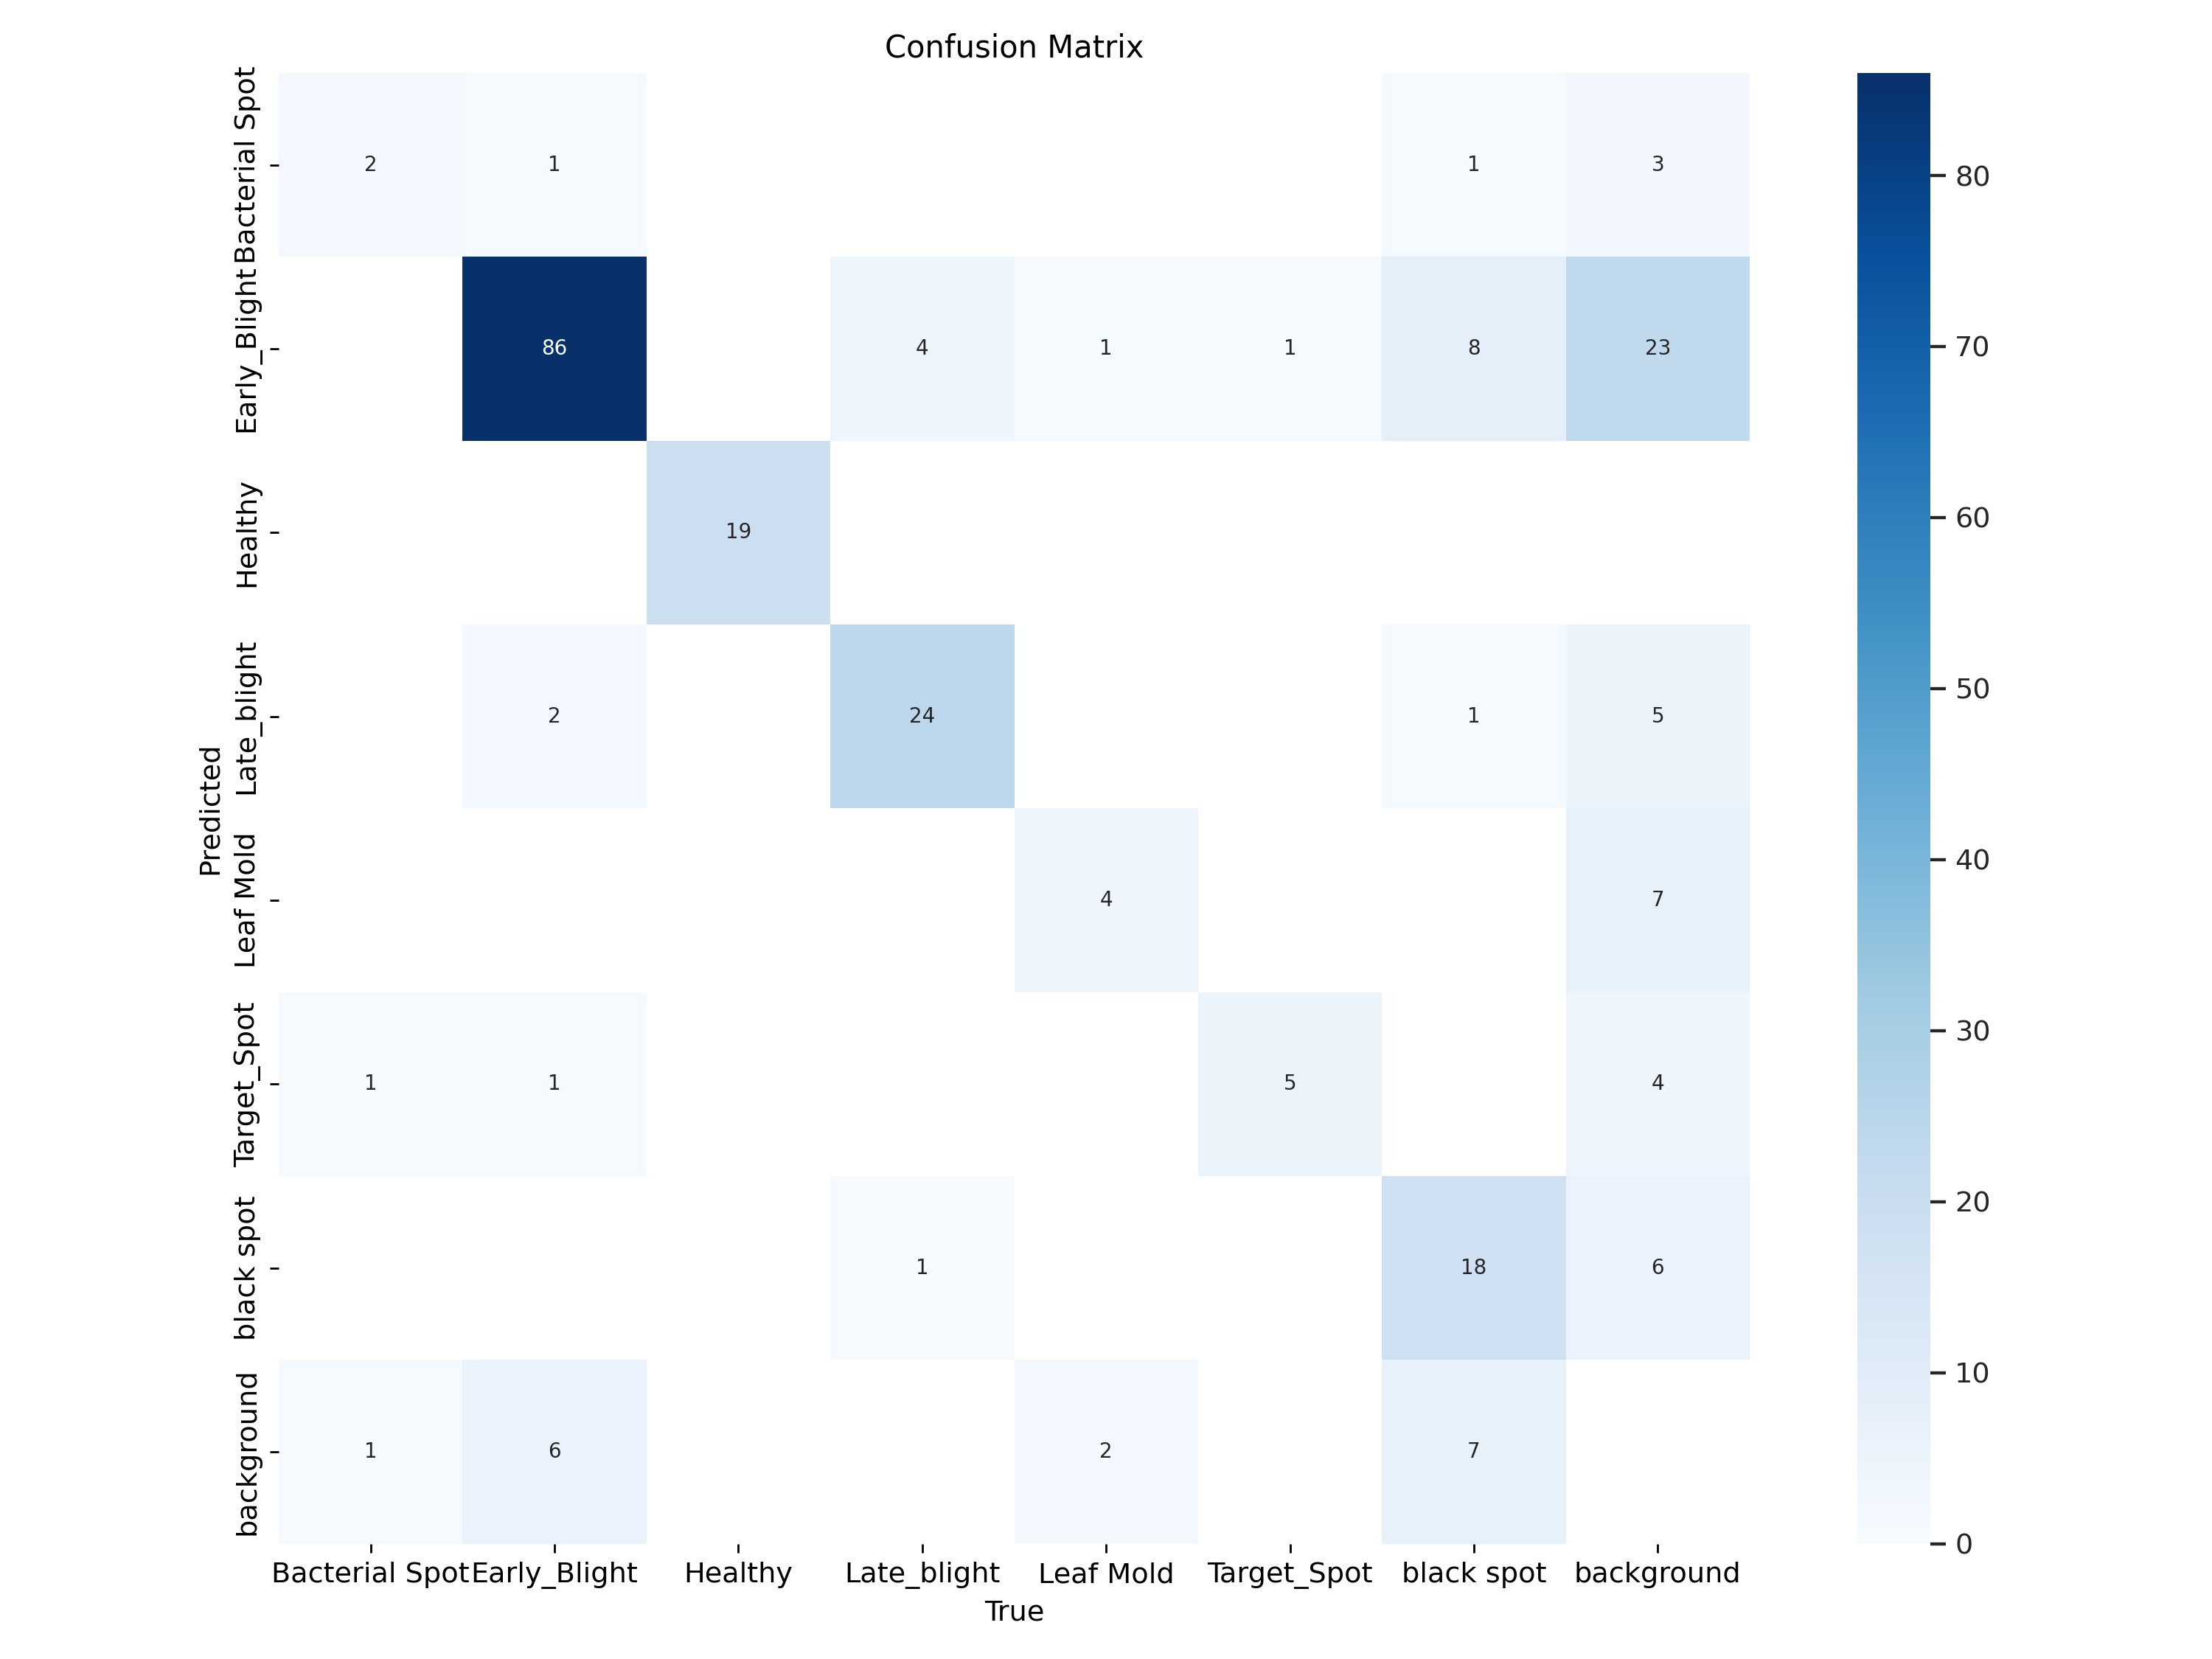

In [4]:
#Confusion matrix is the chart that shows how our model handles different classes
#92% of the time the model detected correctly that the person is wearing jacket, while 1% of the time we get the Bounding Box but
#the jacket is incorrectly classified as Eye wear, while 7% of the time when person is wearing the Jacket the model is unable to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

#**F1 Curve**

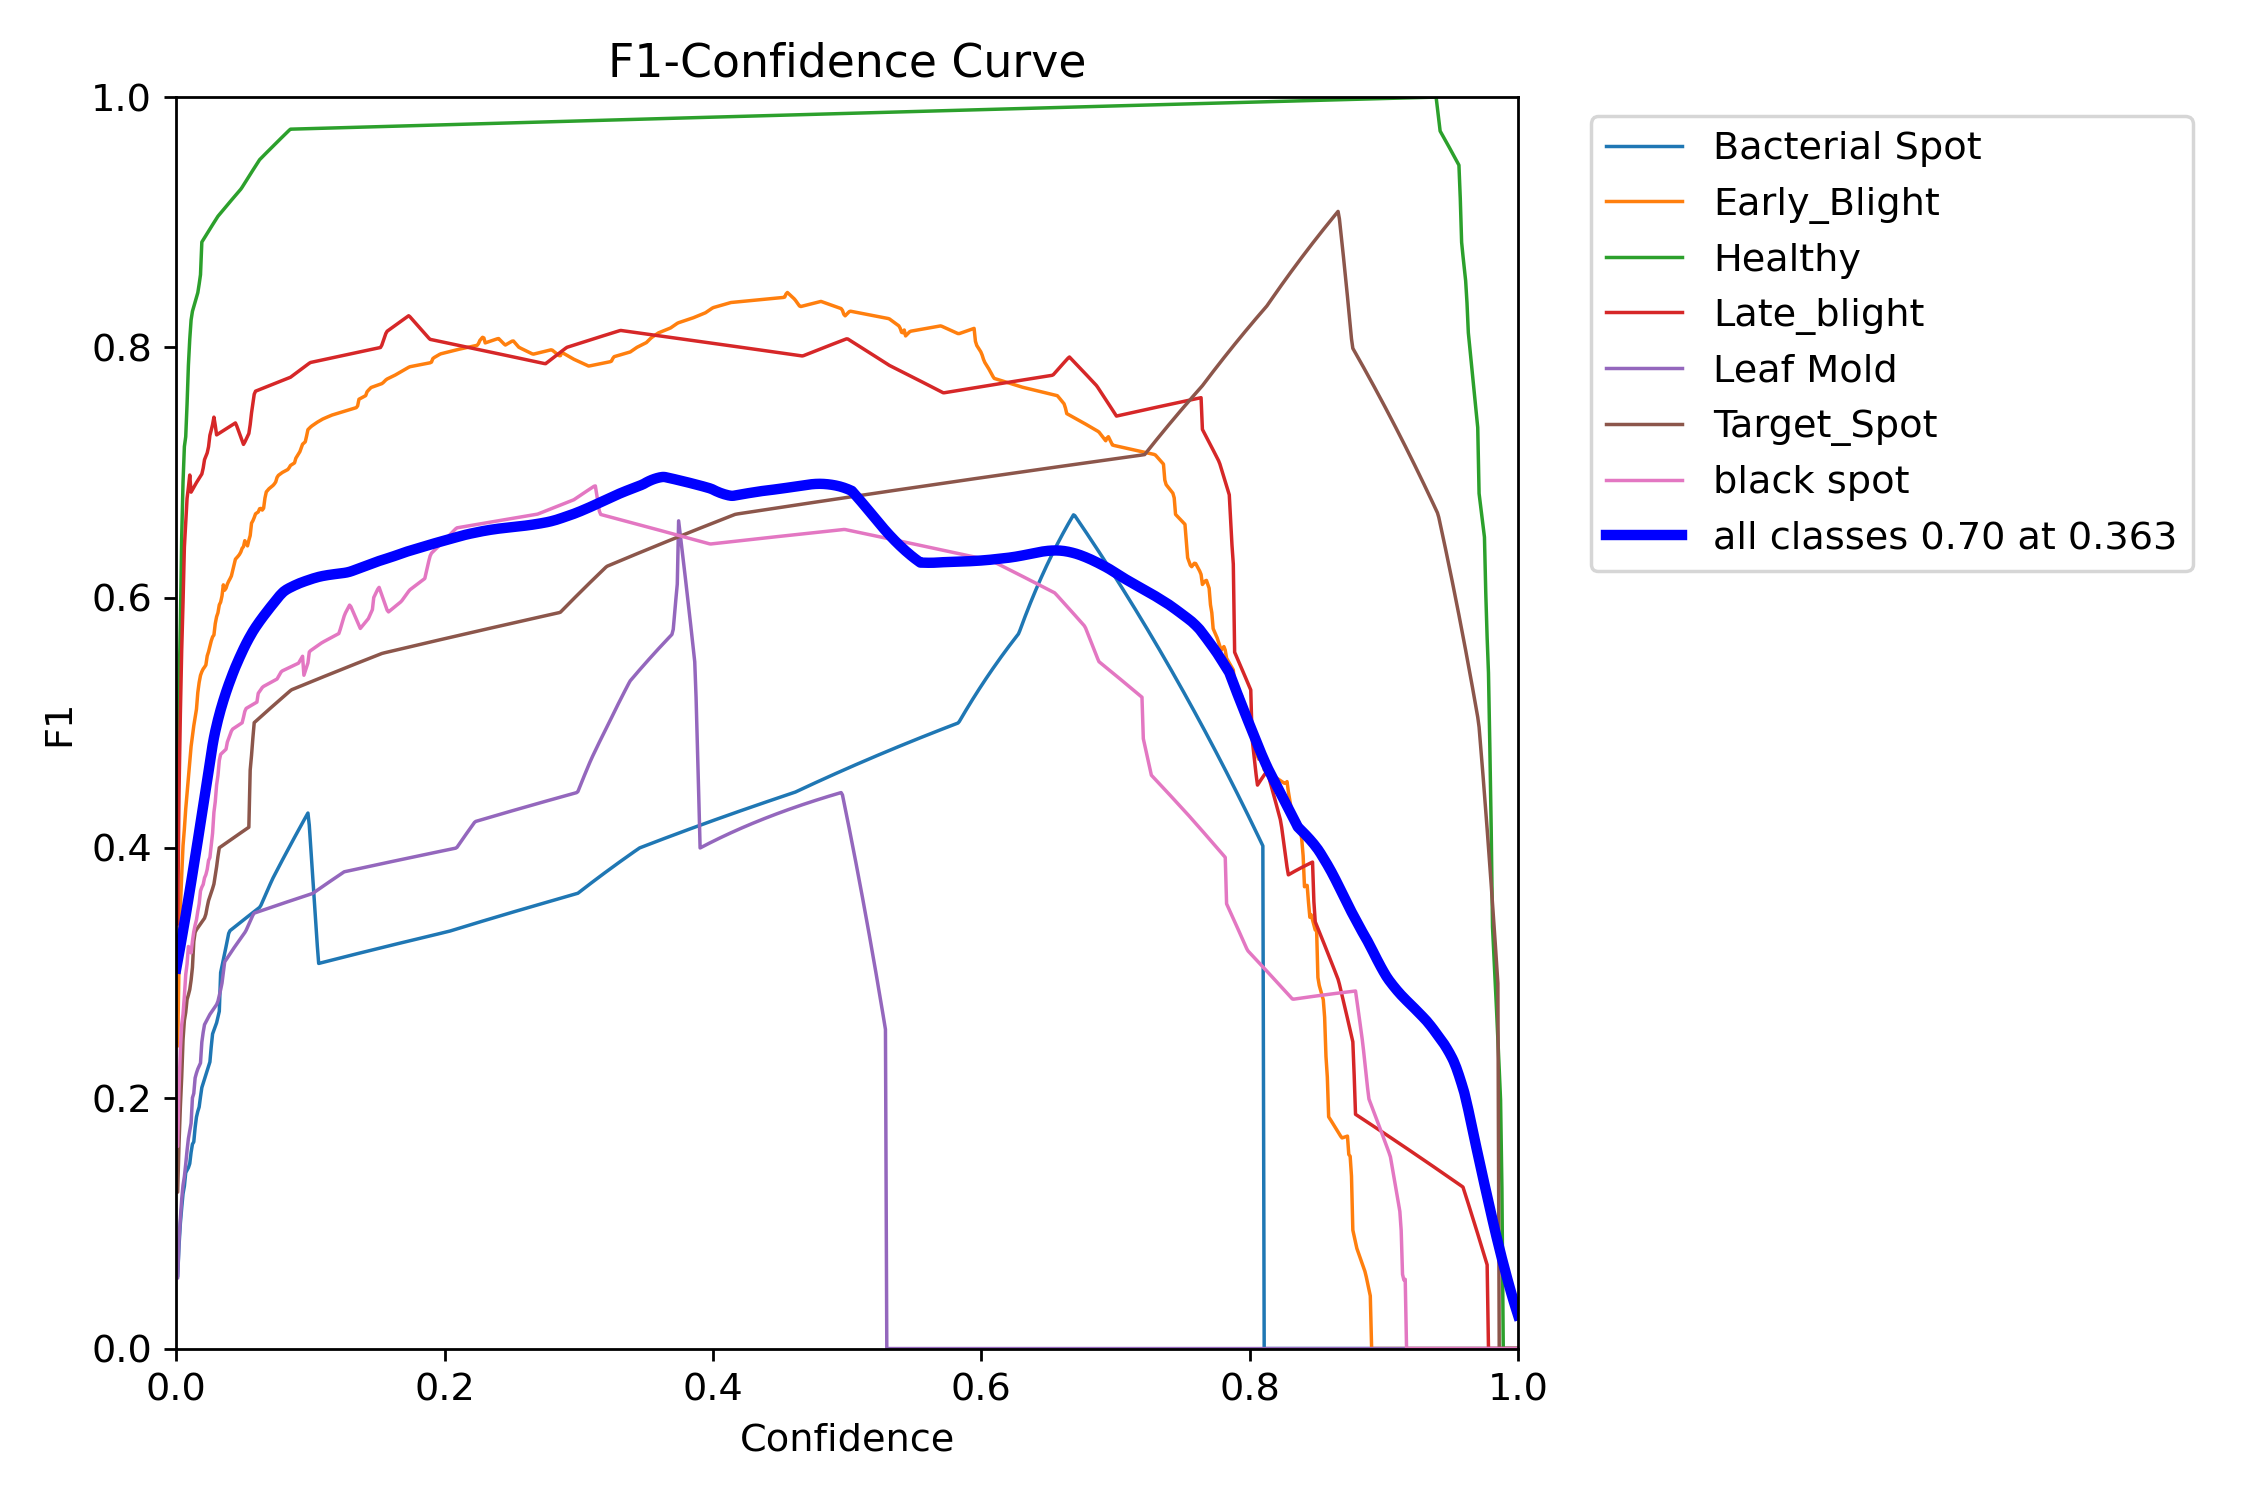

In [5]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

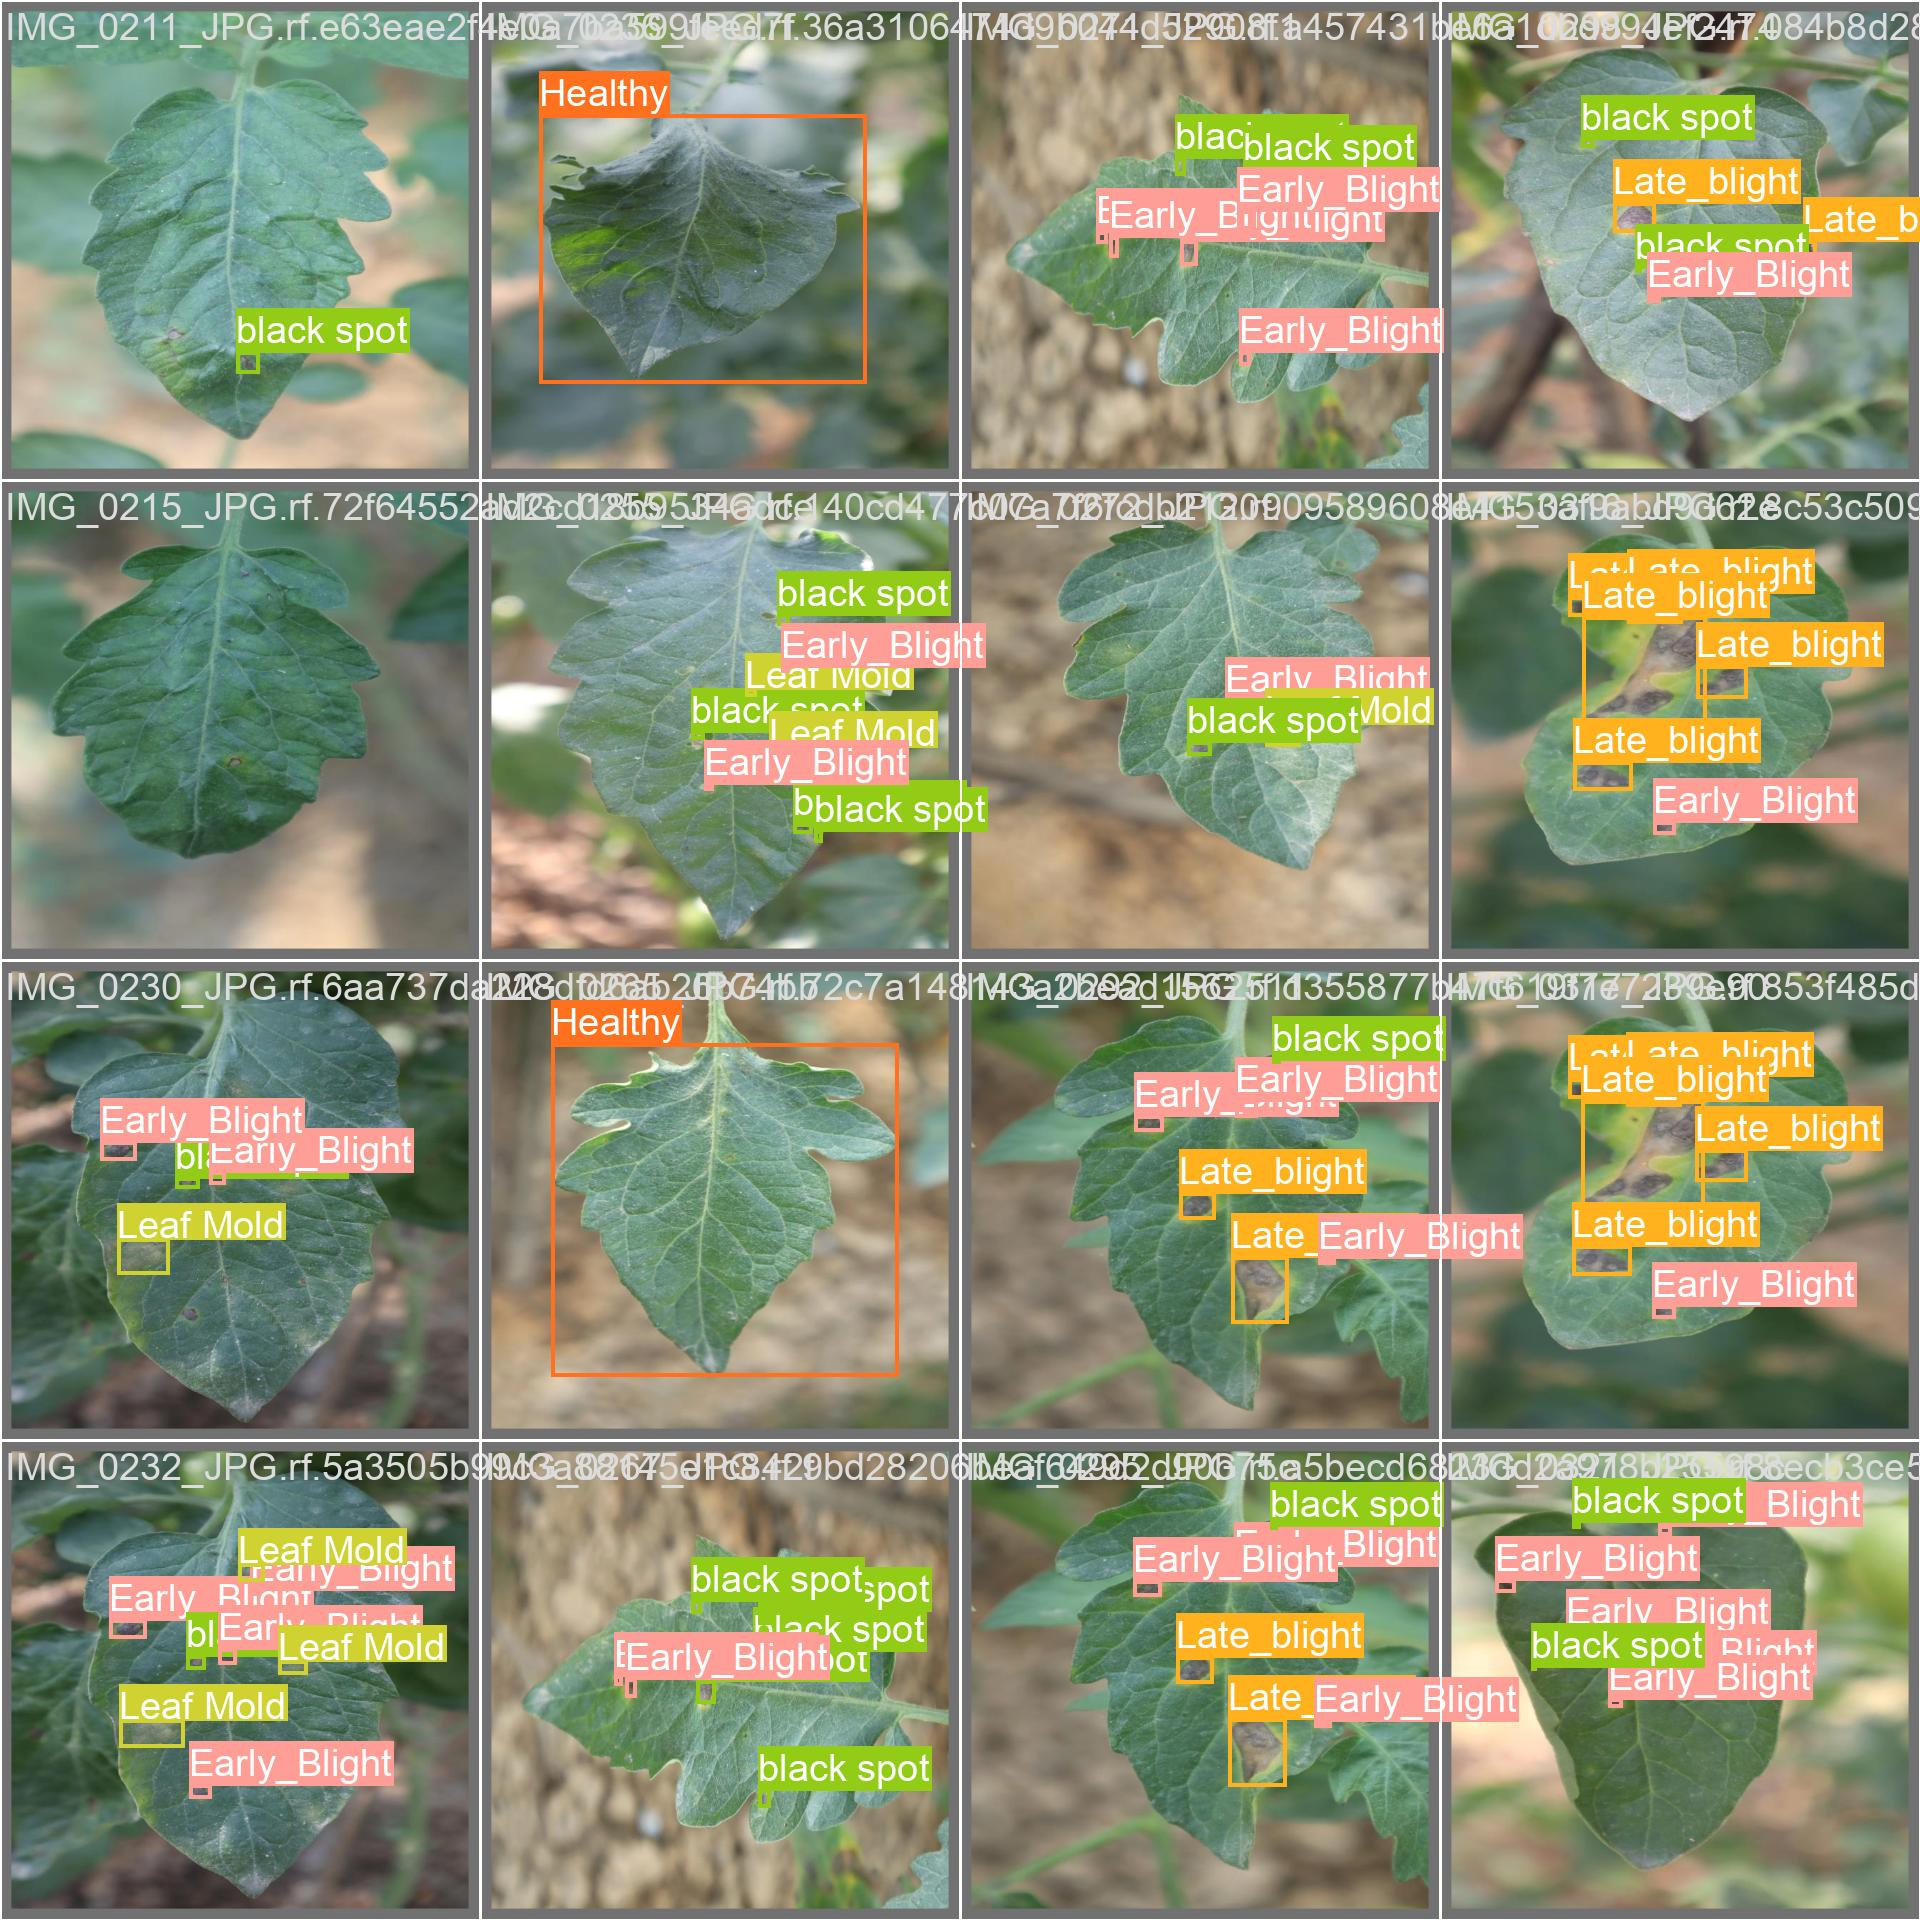

In [6]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_labels.jpg', width=600)

#**Testing on New Images**

In [ ]:
%cd {HOME}

!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolo/model_file/best.pt conf=0.25 source='/content/drive/MyDrive/Yolo/tested images/tom_4.jpeg'

/content
Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68130309 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 /content/drive/MyDrive/Yolo/tested images/tom_4.jpeg: 640x448 6 Early_Blights, 2 black spots, 81.7ms
Speed: 2.8ms preprocess, 81.7ms inference, 665.9ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


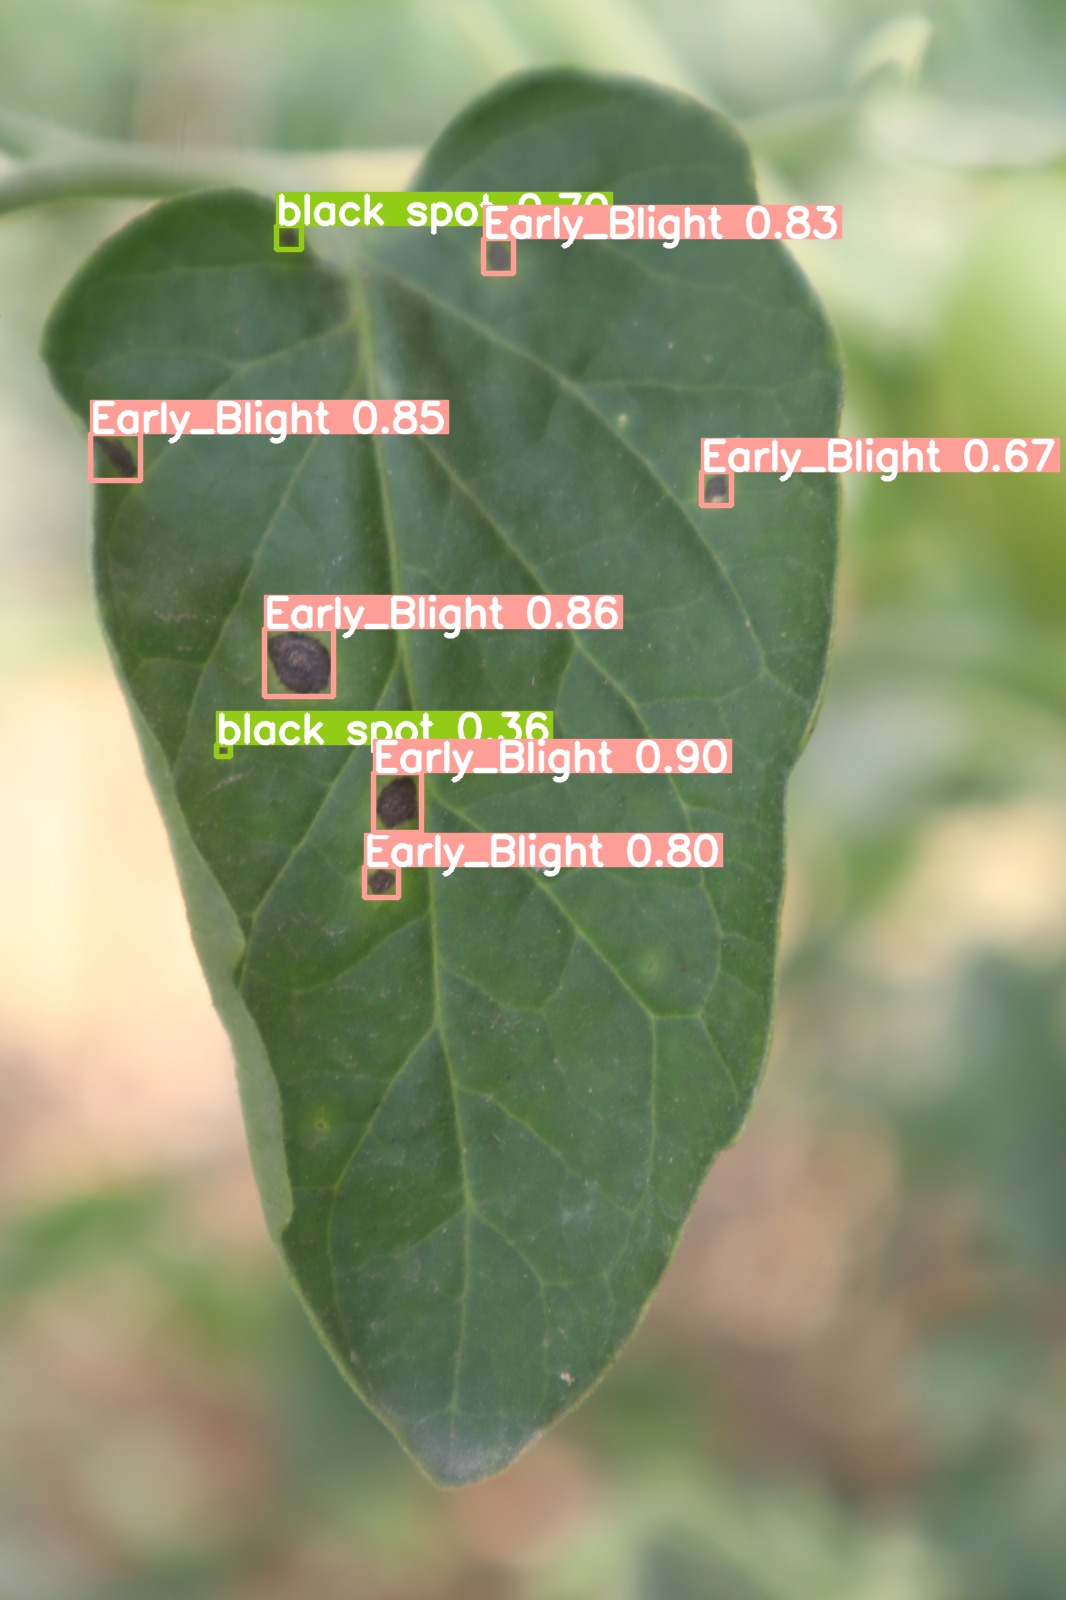

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/predicted images/tom_4.jpeg', width=600)